In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_imdb_raw = pd.read_csv("IMDB movies.csv", low_memory=False)

In [4]:
df_imdb = df_imdb_raw.copy(deep=True)

In [37]:
df_imdb

,imdb_title_id,title,year,genre,duration,country
0,tt0000009,Miss Jerry,1894,Romance,45,USA
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia
2,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark"
3,tt0002101,Cleopatra,1912,"Drama, History",100,USA
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy
...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,95,"France, Belgium"
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,India
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey


In [5]:
df_imdb.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [6]:
df_imdb = df_imdb[["imdb_title_id", "title", "year", "genre", "duration", "country"]]

In [7]:
no_country = df_imdb[df_imdb["country"].isnull()].index

In [8]:
df_imdb.drop(no_country, axis=0, inplace=True)

In [9]:
df_imdb.shape

(85791, 6)

In [10]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85791 entries, 0 to 85854
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   imdb_title_id  85791 non-null  object
 1   title          85791 non-null  object
 2   year           85791 non-null  object
 3   genre          85791 non-null  object
 4   duration       85791 non-null  int64 
 5   country        85791 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [11]:
# see if the id column has duplicated values
df_imdb[df_imdb.duplicated("imdb_title_id", keep="first")]

,imdb_title_id,title,year,genre,duration,country


### Distribution of Genre

In [16]:
# get top 10 value counts of genre column
top_genre = df_imdb.value_counts("genre")[:10]

In [27]:
top_genre

genre
Drama                     12534
Comedy                     7683
Comedy, Drama              4038
Drama, Romance             3455
Comedy, Romance            2508
Comedy, Drama, Romance     2293
Horror                     2257
Drama, Thriller            1348
Crime, Drama               1342
Action, Crime, Drama       1310
Name: count, dtype: int64

/var/folders/vq/2kd0vv8j2gq5zmzx9dpn0ylc0000gn/T/ipykernel_905/3725805819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre.index, y=top_genre.values,


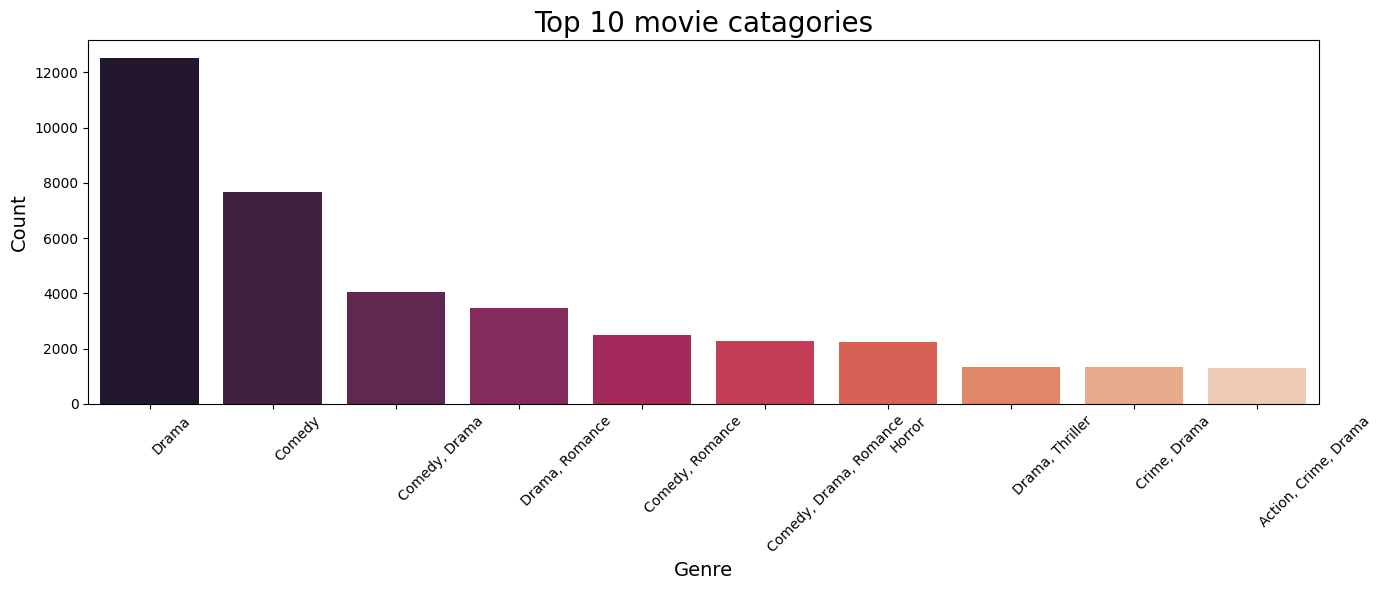

In [35]:
plt.figure(figsize=(14, 6), tight_layout=True)
sns.barplot(x=top_genre.index, y=top_genre.values,
            palette="rocket")
plt.title("Top 10 movie catagories", fontsize=20)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="left")
plt.show()

### Distribution of Country

In [ ]:
# get top ten countries with the most movie production
top_countries = df_imdb.value_counts("country")[:10]

In [42]:
top_countries

country
USA          28511
India         6065
UK            4111
Japan         3077
France        3055
Italy         2444
Canada        1802
Germany       1396
Turkey        1351
Hong Kong     1239
Name: count, dtype: int64

/var/folders/vq/2kd0vv8j2gq5zmzx9dpn0ylc0000gn/T/ipykernel_905/1148533765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values,


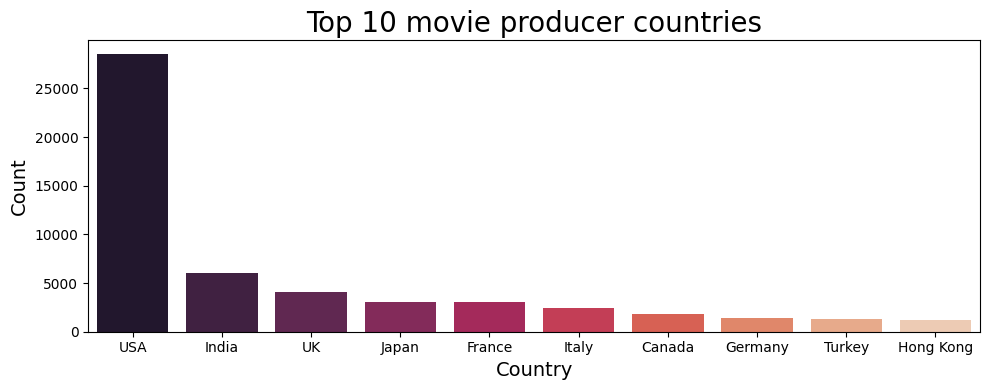

In [ ]:
plt.figure(figsize=(10, 4), tight_layout=True)
sns.barplot(x=top_countries.index, y=top_countries.values,
            palette="rocket")
plt.title("Top 10 movie producer countries", fontsize=20)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

### Duration outliers

#### Task: get the shortest and longest movies from dataframe

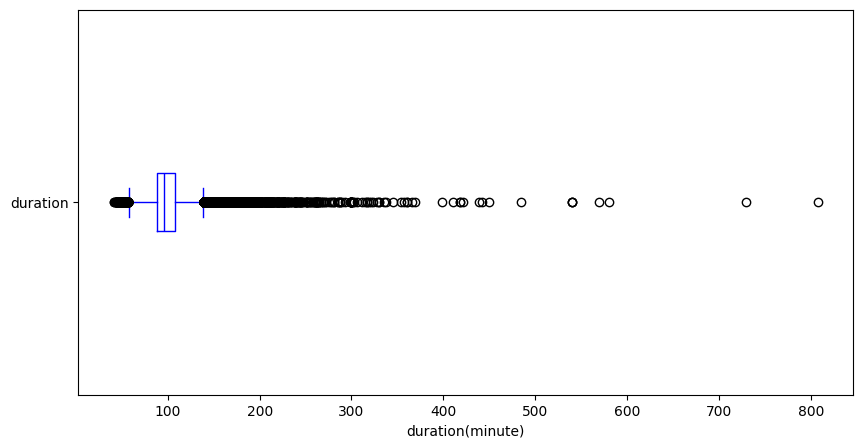

In [ ]:
# plot the duration column with boxplot
df_imdb["duration"].plot(kind="box", color="blue", vert=False,
                         figsize=(10, 5))
plt.xlabel("duration(minute)")
plt.show()

In [ ]:
# get a statistic overview of duration column
df_imdb["duration"].describe()

count    85791.000000
mean       100.352380
std         22.552672
min         41.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        808.000000
Name: duration, dtype: float64

In [69]:
# IQR = Q3 - Q1
# min = Q1 - 1.5 * IQR
# max = Q3 + 1.5 * IQR
IQR = 108 - 88
min = 88 - (1.5 * IQR)
max = 108 + (1.5 * IQR)
print(f"min: {min}")
print(f"max: {max}")

min: 58.0
max: 138.0


In [71]:
# show the outliers
df_imdb[(df_imdb["duration"] < 58) | (df_imdb["duration"] > 138)]

,imdb_title_id,title,year,genre,duration,country
0,tt0000009,Miss Jerry,1894,Romance,45,USA
2,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark"
9,tt0002461,Richard III,1912,Drama,55,"France, USA"
11,tt0002844,Fantômas - À l'ombre de la guillotine,1913,"Crime, Drama",54,France
15,tt0003131,Maudite soit la guerre,1914,"Drama, War",50,Belgium
...,...,...,...,...,...,...
85792,tt9834062,Ahaa Re,2019,Drama,150,India
85806,tt9850264,Bruno Manser - Die Stimme des Regenwaldes,2019,"Adventure, Biography, Drama",142,"Switzerland, Austria"
85826,tt9883042,Aakashaganga II,2019,Horror,142,India
85833,tt9892338,No Dorai,2019,Drama,150,Bangladesh


In [73]:
# show the dataframe without outliers
df_imdb[~((df_imdb["duration"] < 58) | (df_imdb["duration"] > 138))]

,imdb_title_id,title,year,genre,duration,country
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia
3,tt0002101,Cleopatra,1912,"Drama, History",100,USA
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA
6,tt0002423,Madame DuBarry,1919,"Biography, Drama, Romance",85,Germany
...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,95,"France, Belgium"
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,India
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey
